<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\marcu\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (2.2.2)




[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


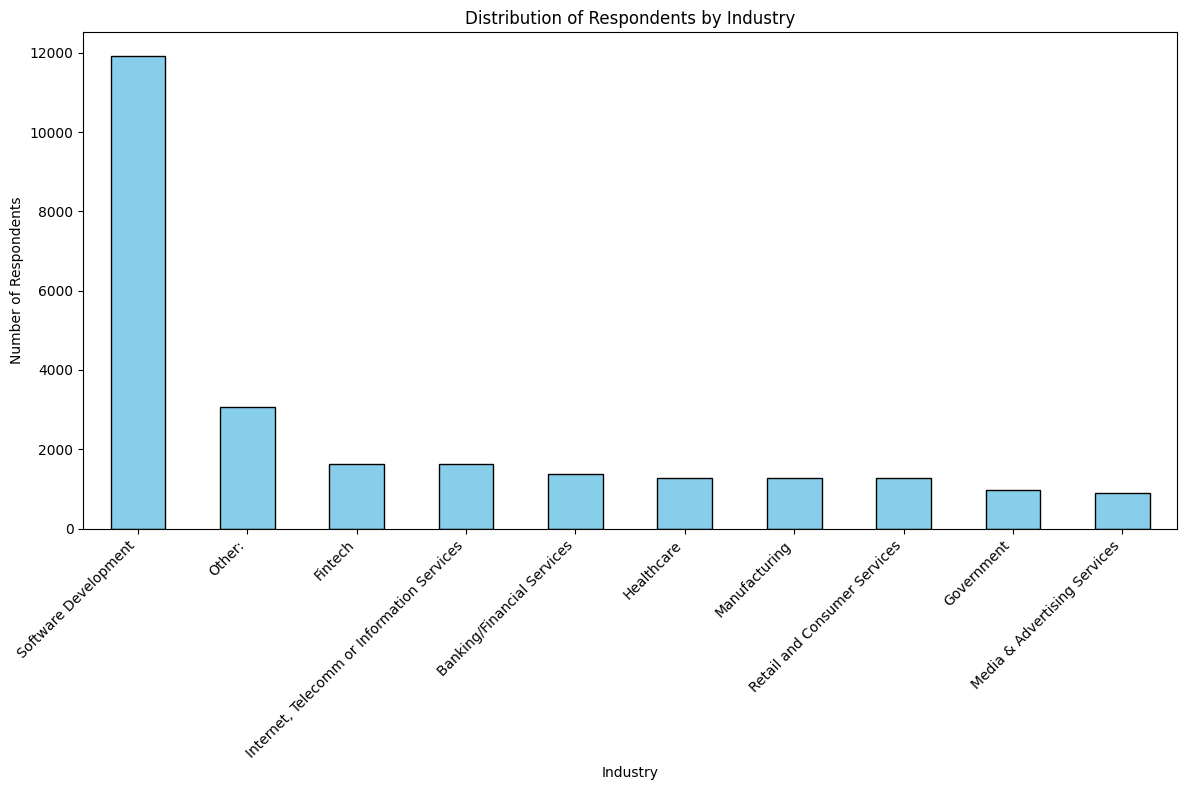

In [3]:
##Write your code here
# Plot the distribution of respondents by industry
plt.figure(figsize=(12, 8))
industry_counts = df['Industry'].value_counts().head(10)  # Limit to top 10 industries for clarity
industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Ensure 'ConvertedCompYearly' is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Calculate basic statistics for 'ConvertedCompYearly'
comp_mean = df['ConvertedCompYearly'].mean()
comp_median = df['ConvertedCompYearly'].median()
comp_std = df['ConvertedCompYearly'].std()

# Define the threshold for high compensation outliers (3 standard deviations above the mean)
threshold = comp_mean + 3 * comp_std

# Identify outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

# Display basic statistics and the number of outliers
stats = {
    "Mean": comp_mean,
    "Median": comp_median,
    "Standard Deviation": comp_std,
    "Threshold": threshold,
    "Number of Outliers": len(high_comp_outliers)
}

stats


{'Mean': 86155.28726264134,
 'Median': 65000.0,
 'Standard Deviation': 186756.97308629757,
 'Threshold': 646426.2065215341,
 'Number of Outliers': 89}

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


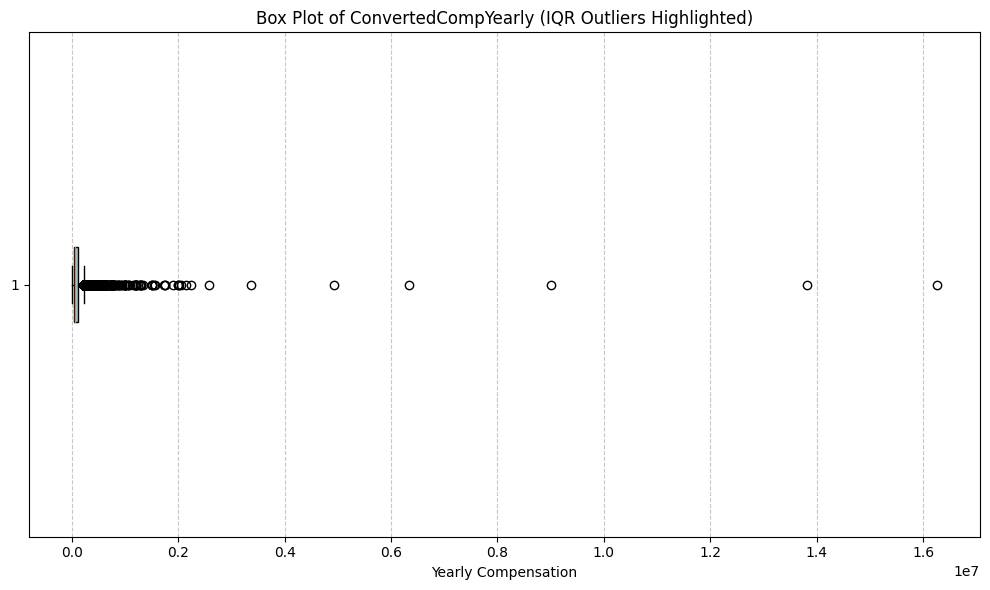

{'Lower Bound': -80177.25, 'Upper Bound': 220860.75, 'Number of Outliers': 978}

In [5]:
##Write your code here
# Calculate the Interquartile Range (IQR)
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1

# Determine the upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count outliers
outlier_count = len(iqr_outliers)

# Visualize the outliers using a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Box Plot of ConvertedCompYearly (IQR Outliers Highlighted)')
plt.xlabel('Yearly Compensation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the bounds and count of outliers
outlier_stats = {
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound,
    "Number of Outliers": outlier_count
}


outlier_stats


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Create a new DataFrame excluding outliers in 'ConvertedCompYearly'
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]
size_difference = original_size - new_size

{"Original Size": original_size, "New Size": new_size, "Rows Removed": size_difference}


{'Original Size': 65437, 'New Size': 22457, 'Rows Removed': 42980}

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


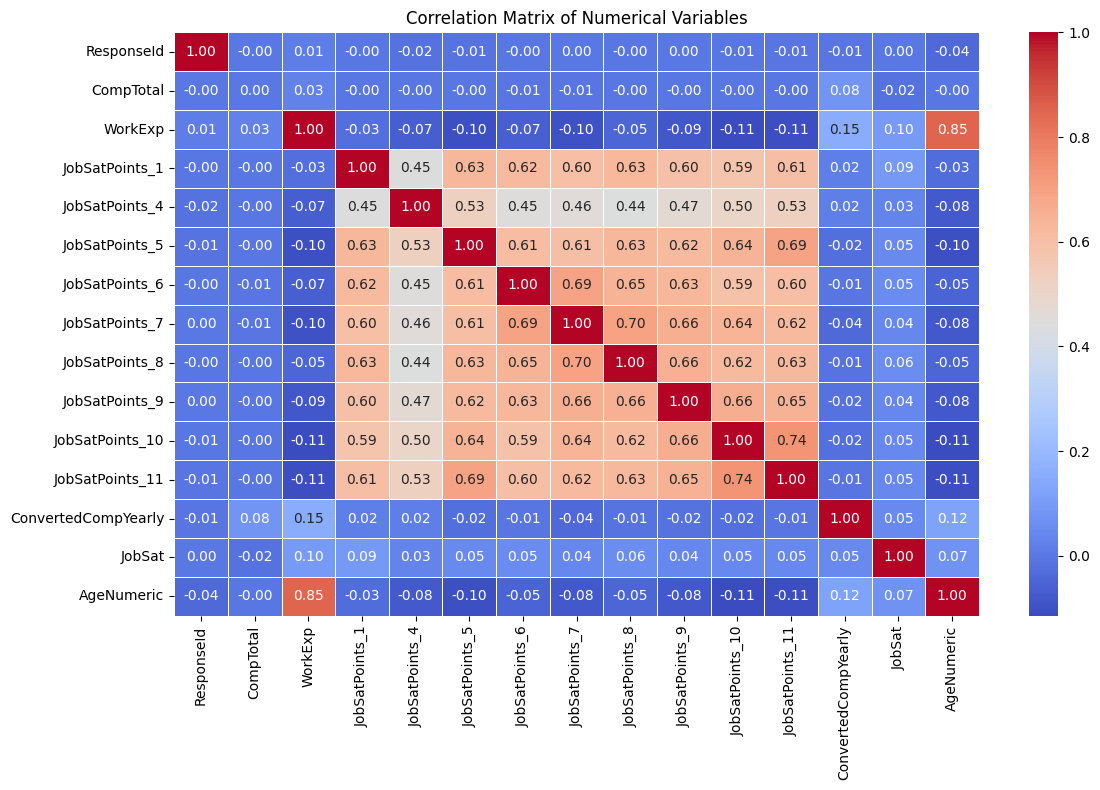

AgeNumeric             1.000000
WorkExp                0.848803
ConvertedCompYearly    0.122133
JobSat                 0.069818
CompTotal             -0.002698
JobSatPoints_1        -0.027675
ResponseId            -0.038245
JobSatPoints_8        -0.046204
JobSatPoints_6        -0.050017
JobSatPoints_4        -0.076150
JobSatPoints_9        -0.081759
JobSatPoints_7        -0.083232
JobSatPoints_5        -0.101560
JobSatPoints_11       -0.107170
JobSatPoints_10       -0.114571
Name: AgeNumeric, dtype: float64

In [7]:
##Write your code here
import numpy as np
import seaborn as sns

# Map the 'Age' column to approximate numeric values (if applicable)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

# Compute correlations of 'AgeNumeric' with other numeric columns
age_correlations = correlation_matrix['AgeNumeric'].sort_values(ascending=False)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Display the correlations of 'AgeNumeric' with other numerical variables

age_correlations

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
